# TP 2 : Linear regression (SD-TSIA204)

For this lab, you have to upload a single ipynb file. Please use the following script to format your filename (bad name will lead to a 1 point penalty):

```
# Change here using YOUR own FIRST and last names
fn1 = "john"
ln1 = "smith"
filename = "_".join(map(lambda s: s.strip().lower(), ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"
```
You have to upload it on eCampus. The deadline is the 31/01/2024 at 23h59 in eCampus. Out of 20 points, 5 are specifically dedicated to:
- Presentation quality: writing, clarity, no typos, visual efforts for graphs, titles, legend, colorblindness, etc. (2 points).
- Coding quality: indentation, PEP8 Style, readability, adapted comments, brevity (2 points)
- No bug on the grader’s machine (1 point)

### Beware:
1) Labs submitted late, by email or uploaded in a wrong group folder will be graded 0/20.
2) The package statsmodel in NOT allowed.
3) For certain questions, answers must be accompanied by explanations. An answer without an explanation will be graded as 0.

- Note: you can use https://github.com/agrmf/check_notebook to check your notebook is fine, and also use https://github.com/kenkoooo/jupyter-autopep8 to enforce pep8 style.


## Processing the data

1. For the first question, we load a standart dataset from sklearn.datasets named fetch_california_housing. This dataset has only p = 8 variables.

In [15]:
# Importing libraries ---------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Importing the dataset -------------------------------------------------------
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

# Dataset size 
data_size = len(dataset.data)
print('Dataset size: ', data_size)

# Adding the intercept term
X_1p = np.c_[np.ones((data_size, 1)), dataset.data]

# Splitting the dataset into the Training set and Test set --------------------
from sklearn.model_selection import train_test_split

# Random state = 0 implies that the split will always be the same
# Random state = None implies that the split will always be different
# Random state = any other number implies that the split will be random but the same for a given number
X_train_1p, X_test_1p, y_train_1p, y_test_1p = train_test_split(X_1p, dataset.target, test_size = 0.2, random_state = 7)


Dataset size:  20640


 - Estimate the coefficients with the expression of the normal equations seen in class. Code two functions to compute the MSE and the R2 coefficient and compare them with the version of sklearn for the train and the test sets.



In [16]:
# MSE Function
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

# R2 Function
def r2(y, y_hat):
    return 1 - mse(y, y_hat) / np.var(y)

In [17]:
# Estimating the parameters ----------------------------------------------------
# Calculating the parameters for the training set
XtX_train_1p = np.dot(X_train_1p.T, X_train_1p)
Xty_train_1p = np.dot(X_train_1p.T, y_train_1p)
beta_train_1p = np.dot(np.linalg.inv(XtX_train_1p), Xty_train_1p)

# Calculating the parameters for the testing set
XtX_test_1p = np.dot(X_test_1p.T, X_test_1p)
Xty_test_1p = np.dot(X_test_1p.T, y_test_1p)
beta_test_1p = np.dot(np.linalg.inv(XtX_test_1p), Xty_test_1p)

# Computing the solutions -------------------------------------------------------
# Computing the solution for the training set
y_hat_train_1p = np.dot(X_train_1p, beta_train_1p)

# Computing the solution for the testing set
y_hat_test_1p = np.dot(X_test_1p, beta_test_1p)

In [18]:
# Comparing the training set with the sklearn library -------------------------
print('Training set: --------------------------')

# From the functions declared above
print('MSE function: ', mse(y_train_1p, y_hat_train_1p))
print('R2 function: ', r2(y_train_1p, y_hat_train_1p))

# From the sklearn library
print('MSE sklearn: ', mse(y_train_1p, y_hat_train_1p))
print('R2 sklearn: ', r2(y_train_1p, y_hat_train_1p))

# Difference between the two methods
print('MSE difference: ', mse(y_train_1p, y_hat_train_1p) - mse(y_train_1p, y_hat_train_1p))
print('R2 difference: ', r2(y_train_1p, y_hat_train_1p) - r2(y_train_1p, y_hat_train_1p))

# Comparing the test set with the sklearn library -----------------------------
print('Testing set: --------------------------')

# From the functions declared above
print('MSE function: ', mse(y_test_1p, y_hat_test_1p))
print('R2 function: ', r2(y_test_1p, y_hat_test_1p))

# From the sklearn library
print('MSE sklearn: ', mse(y_test_1p, y_hat_test_1p))
print('R2 sklearn: ', r2(y_test_1p, y_hat_test_1p))

# Difference between the two methods
print('MSE difference: ', mse(y_test_1p, y_hat_test_1p) - mse(y_test_1p, y_hat_test_1p))
print('R2 difference: ', r2(y_test_1p, y_hat_test_1p) - r2(y_test_1p, y_hat_test_1p))

Training set: --------------------------
MSE function:  0.5237739722635567
R2 function:  0.605509337944799
MSE sklearn:  0.5237739722635567
R2 sklearn:  0.605509337944799
MSE difference:  0.0
R2 difference:  0.0
Testing set: --------------------------
MSE function:  0.5186803953017145
R2 function:  0.6143687469995657
MSE sklearn:  0.5186803953017145
R2 sklearn:  0.6143687469995657
MSE difference:  0.0
R2 difference:  0.0


(b) Finally, give the confidence intervals at level 99% for all the coefficients coding the expression for the CI


Confidence interval: 
[[-3.83939503e+01 -3.50255003e+01]
 [ 4.22033193e-01  4.43413859e-01]
 [ 7.98086643e-03  1.02745282e-02]
 [-1.14825947e-01 -8.50003328e-02]
 [ 5.19669877e-01  6.60750738e-01]
 [-1.64242236e-05  7.75788619e-06]
 [-6.71872000e-03 -2.66424538e-03]
 [-4.36942719e-01 -4.00153687e-01]
 [-4.51369975e-01 -4.12870982e-01]]


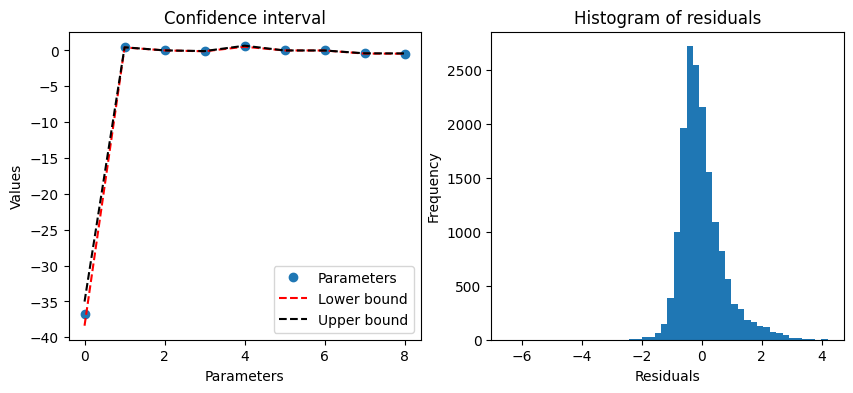

In [19]:
# Confidence interval at level alpha = 0.01 (99% confidence) ------------------
# Calculating the standard error
sigma2_1p = np.sum((y_train_1p - y_hat_train_1p)**2) / (data_size - 2)
sigma_1p = np.sqrt(sigma2_1p)
XtX_inv_1p = np.linalg.inv(XtX_train_1p)
se_1p = np.sqrt(np.diag(sigma2_1p * XtX_inv_1p))

# Calculating the t-statistic
from scipy.stats import t
t_stat_1p = t.ppf(1 - 0.005, data_size - 2)

# Calculating the confidence interval
ci_1p = np.c_[beta_train_1p - t_stat_1p * se_1p, beta_train_1p + t_stat_1p * se_1p]

# Printing the confidence interval
print('Confidence interval: ')
print(ci_1p)

# Plotting the confidence interval and the histogram of residuals in a 1x2 grid --
# Confidence interval
plt.figure(figsize = (10, 4))
plt.subplot(121)
plt.plot(beta_train_1p, 'o')
plt.plot(ci_1p[:, 0], 'r--')
plt.plot(ci_1p[:, 1], 'k--')
plt.xlabel('Parameters')
plt.ylabel('Values')
plt.legend(['Parameters', 'Lower bound', 'Upper bound'])
plt.title('Confidence interval')

# Histogram of residuals
plt.subplot(122)
plt.hist(y_train_1p - y_hat_train_1p, bins = 50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of residuals')

plt.show()

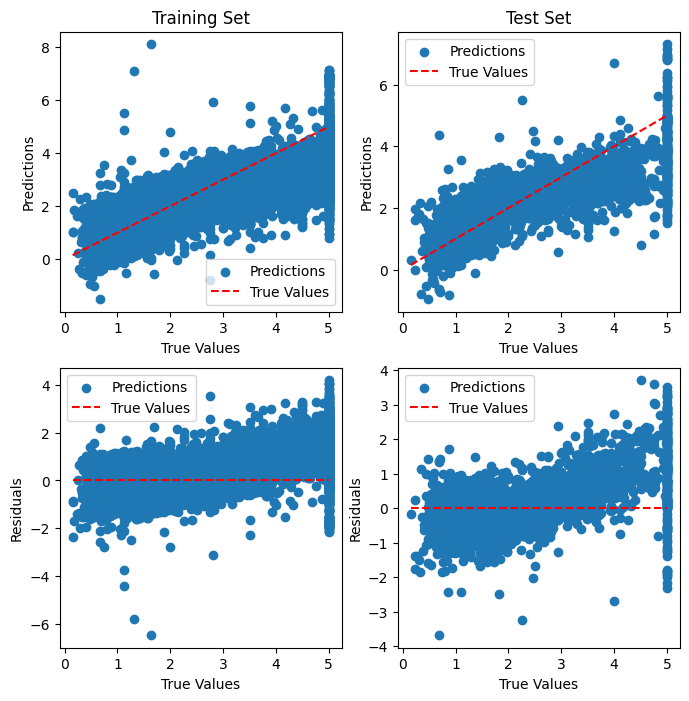

In [20]:
plt.figure(figsize=(8, 8))

# Plotting the training set
plt.subplot(2, 2, 1)
plt.scatter(y_train_1p, y_hat_train_1p)
plt.plot([min(y_train_1p), max(y_train_1p)], [min(y_train_1p), max(y_train_1p)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend(['Predictions', 'True Values'])
plt.title('Training Set')

# Plotting the test set
plt.subplot(2, 2, 2)
plt.scatter(y_test_1p, y_hat_test_1p)
plt.plot([min(y_test_1p), max(y_test_1p)], [min(y_test_1p), max(y_test_1p)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend(['Predictions', 'True Values'])
plt.title('Test Set')

# Plotting the residuals for the training set
plt.subplot(2, 2, 3)
plt.scatter(y_train_1p, y_train_1p - y_hat_train_1p)
plt.plot([min(y_train_1p), max(y_train_1p)], [0, 0], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.legend(['Predictions', 'True Values'])

# Plotting the residuals for the test set
plt.subplot(2, 2, 4)
plt.scatter(y_test_1p, y_test_1p - y_hat_test_1p)
plt.plot([min(y_test_1p), max(y_test_1p)], [0, 0], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.legend(['Predictions', 'True Values'])

plt.show()

2. For the rest of the TP, we use the dataset in eCampus data. Load and preprocess the data.

- Separate the data in train and test sets: save one fourth of the data as testing (train_test_split from sklearn.model_selection with the random seed set to 0) and standardize both the training and testing sets using the fit_transform and transform functions in sklearn.preprocessing.StandardScaler.

In [21]:
# Separating the data again ----------------------------------------------------
from sklearn.model_selection import train_test_split

import pandas as pd
data = pd.read_csv('data.csv')

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Random state = 0 implies that the split will always be the same
# Random state = None implies that the split will always be different
# Random state = any other number implies that the split will be random but the same for a given number
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Estanrdizing the data (mean = 0, variance = 1) ------------------------------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- Fit a regular OLS.


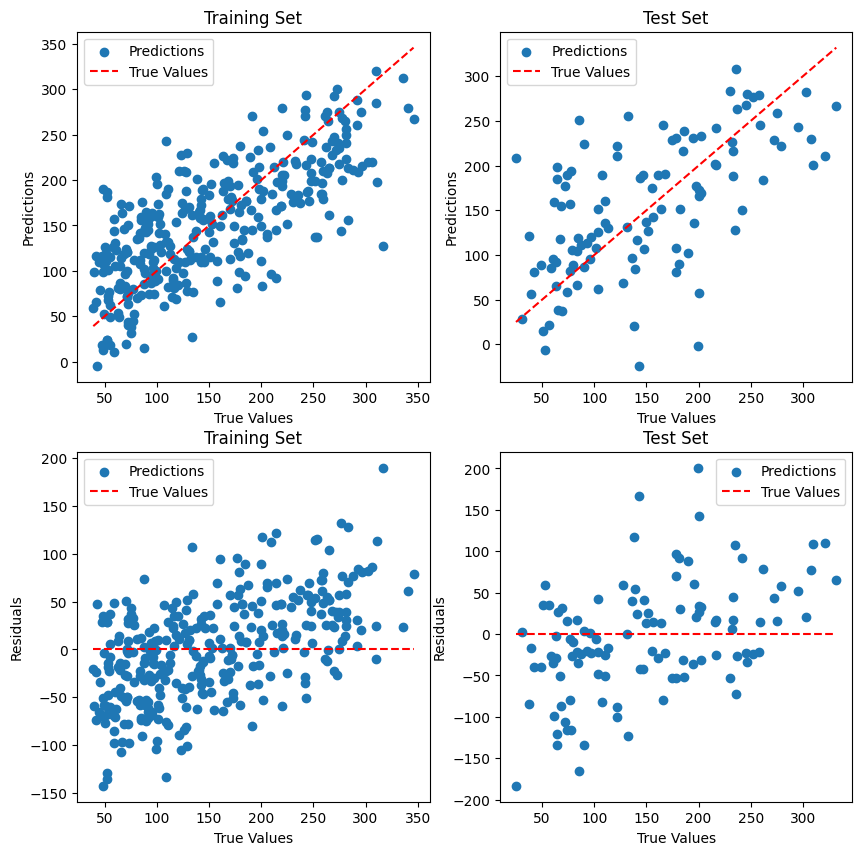

In [23]:
# Fitting a regular OLS model --------------------------------------------------
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Ploting the results ----------------------------------------------------------
plt.figure(figsize=(10, 10))

# Plotting the training set
plt.subplot(2, 2, 1)
plt.scatter(y_train, regressor.predict(X_train))
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend(['Predictions', 'True Values'])
plt.title('Training Set')

# Plotting the test set
plt.subplot(2, 2, 2)
plt.scatter(y_test, regressor.predict(X_test))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend(['Predictions', 'True Values'])
plt.title('Test Set')

# Plotting the residuals for the training set
plt.subplot(2, 2, 3)
plt.scatter(y_train, y_train - regressor.predict(X_train))
plt.plot([min(y_train), max(y_train)], [0, 0], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.legend(['Predictions', 'True Values'])
plt.title('Training Set')

# Plotting the residuals for the test set
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_test - regressor.predict(X_test))
plt.plot([min(y_test), max(y_test)], [0, 0], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.legend(['Predictions', 'True Values'])
plt.title('Test Set')

plt.show()

## Variable Selection

Program the method of forward variable selection based on hypothesis tests for regression coefficients. This method starts from an empty set of variables `S` and at each iteration selects one variable relevant for predicting `y` and includes it in the set `S`. It runs until a halting condition is met. The coding process is as follows:


(a) Develop a function that, given a dataset `X ∈ ℝⁿˣᵖ` and `y`, fits `p` linear regression models, each using only feature `X_j` to predict `y`. For each model, conduct a test of no effect, as discussed in session 3, and compute the p-value of the test. This function should return the coefficient with the smallest p-value. Explain the significance of the p-value in this context.

In [24]:
import numpy as np
from scipy.stats import t

def t_test(X, y):
    # Number of observations
    n = len(y)
    
    # Number of variables, including the intercept
    p = X.shape[1] + 1
    
    # Adding the intercept term
    X = np.c_[np.ones((n, 1)), X]
    
    # Calculating the parameters
    XtX = np.dot(X.T, X)
    XtX_inv = np.linalg.inv(XtX)
    beta = np.dot(XtX_inv, np.dot(X.T, y))
    
    # Calculating the standard error
    residuals = y - np.dot(X, beta)
    sigma2 = np.sum(residuals**2) / (n - p)
    se = np.sqrt(np.diag(sigma2 * XtX_inv))
    
    # Calculating the t-statistic
    t_stat = beta[1:] / se[1:]  # Exclude the intercept
    
    # Calculating the p-values
    p_values = 2 * (1 - t.cdf(np.abs(t_stat), n - p))
    
    # Find the index of the smallest p-value
    min_p_index = np.argmin(p_values)
    min_p_value = p_values[min_p_index]
    
    # Calculating the confidence interval for the smallest p-value
    ci_lower = beta[min_p_index + 1] - t_stat[min_p_index] * se[min_p_index + 1]
    ci_upper = beta[min_p_index + 1] + t_stat[min_p_index] * se[min_p_index + 1]
    ci = (ci_lower, ci_upper)
    
    # Return the smallest p-value and its corresponding confidence interval
    return min_p_value, ci, se[1:], beta[1:]

- Apply the function iteratively. At each iteration, select the feature `X_f` with the smallest p-value and:
   - i. Include it in the set `S`.
   - ii. Remove it from `X`.
   - iii. Subtract from `y` the residuals of the model fit with feature `X_f`. 
  
  Add a halting condition to the algorithm: Stop adding features to the set `S` when the p-value exceeds 0.05.

Elaborate on the reason for subtracting the predictions:

*When we substract the predictions, we basically are calculating the residual. `residual = y - ŷ`*

*Residuals are used to understand the discrepancy between the model prediction and actual data. Analyzing the residuals can help us understand whether the assumptions of our regression model are met.*

In [30]:
import numpy as np
from scipy.stats import t
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Define your t_test function here

# Initialize the selected features set, the pool of features, and residuals
S = []
pool_of_features = list(range(X_train.shape[1]))
y_residual = y_train.copy()

# Keep track of the p-values for the selected features and the t-statistics at each step
selected_p_values = []
t_stats_steps = []

# Initialize a matrix to store p-values for each step
num_features = X_train.shape[1]
num_steps = 5
p_values_matrix = np.full((num_features, num_steps), np.NaN)  # Initialize with NaNs

print('STARTING STEPWISE REGRESSION (FORWARD)...')

for step in range(num_steps):  # Limit to the first 5 steps
    current_step_p_values = []
    t_stats = []  # Reset t_stats for each step

    print('------------------------------------------')
    print(f'Step {step + 1}:')

    # Calculate t-statistics and p-values for all features
    for j in pool_of_features:
        p_value, ci, standard_errors, beta = t_test(X_train[:, j].reshape(-1, 1), y_residual)
        current_step_p_values.append(p_value)
        t_stat = beta / standard_errors
        t_stats.append(t_stat)

        print(f'Feature: {j}, p-value: {p_value}, t-stat: {t_stat}')

    # Fill the matrix with p-values for the current step
    for idx, feature in enumerate(pool_of_features):
        p_values_matrix[feature, step] = current_step_p_values[idx]

    t_stats_steps.append(t_stats)

    # Find the index of the feature with the smallest p-value in the current step
    min_p_value = min(current_step_p_values)
    min_p_index = current_step_p_values.index(min_p_value)
    feature_selected = pool_of_features[min_p_index]

    # Add the selected feature to S and its p-value to selected_p_values
    S.append(feature_selected)
    selected_p_values.append(min_p_value)

    # Remove the selected feature from the pool
    pool_of_features.remove(feature_selected)

    # Fit the model with the selected feature and update the residuals
    regressor = LinearRegression()
    regressor.fit(X_train[:, feature_selected].reshape(-1, 1), y_residual)
    predictions = regressor.predict(X_train[:, feature_selected].reshape(-1, 1))
    y_residual -= predictions

    print(' ')
    print(f'Features in S: {S}')
    print(f'Features in the pool: {pool_of_features}')
    print(f'Residuals: {y_residual}\n')

    # Break if the p-value is not significant
    if min_p_value > 0.05:
        break

STARTING STEPWISE REGRESSION (FORWARD)...
------------------------------------------
Step 1:
Feature: 0, p-value: 0.9146064295997196, t-stat: [-0.10731281]
Feature: 1, p-value: 0.5558469594978321, t-stat: [-0.58962657]
Feature: 2, p-value: 0.17485235732805493, t-stat: [1.35972041]
Feature: 3, p-value: 0.3215409208437854, t-stat: [0.99279659]
Feature: 4, p-value: 0.35476799112183155, t-stat: [0.92669169]
Feature: 5, p-value: 0.40627082081117805, t-stat: [0.8315449]
Feature: 6, p-value: 0.6783758163556208, t-stat: [-0.41505115]
Feature: 7, p-value: 0.8321338920450265, t-stat: [-0.21213447]
Feature: 8, p-value: 0.8043549180039147, t-stat: [0.2479155]
Feature: 9, p-value: 0.5358189421103057, t-stat: [0.61980129]
Feature: 10, p-value: 0.791522591821906, t-stat: [0.26454962]
Feature: 11, p-value: 0.44068771692727005, t-stat: [-0.77197053]
Feature: 12, p-value: 0.7084779671344901, t-stat: [-0.37422603]
Feature: 13, p-value: 0.020746246293482873, t-stat: [2.32381202]
Feature: 14, p-value: 0.29

In [34]:
# Replace zeros with 1e-12 in the p_values_matrix (logarithm of zero is undefined)
p_values_matrix[p_values_matrix == 0] = 1e-15

# Printing the modified matrix of p-values
print(' ')
print('Matrix of p-values:')
print(p_values_matrix)

 
Matrix of p-values:
[[0.91460643 0.66709845 0.45519306 0.65334593 0.59837595]
 [0.55584696 0.93112321 0.90041171 0.7424814  0.91986066]
 [0.17485236 0.18096343 0.15436395 0.11913617 0.23828514]
 ...
 [0.85423066 0.54931373 0.92552763 0.87494663 0.93673457]
 [0.06678801 0.07798003 0.02201058 0.01262076 0.02777826]
 [0.17529216 0.04794428 0.13753765 0.18084475 0.16969905]]


*The selected features after the forward variable selection process are the followings:*

In [32]:
print('Selected features and p-values:')
for i, feature in enumerate(S):
    
    print(f'Feature: {feature}, p-value: {selected_p_values[i]}')

Selected features and p-values:
Feature: 34, p-value: 0.0
Feature: 58, p-value: 2.220446049250313e-16
Feature: 79, p-value: 4.5987196377605954e-06
Feature: 167, p-value: 5.167211161172247e-07
Feature: 135, p-value: 5.747204702921671e-05


- Plot the p-values for every coefficient for the first 5 iterations (all in the same plot).

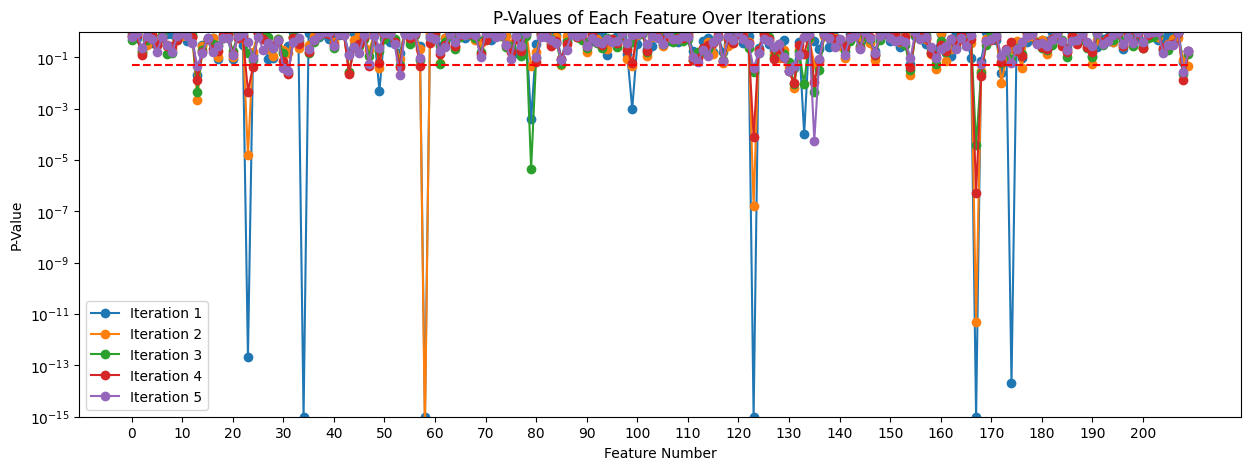

In [41]:
plt.figure(figsize=(15, 5))

# Iterate over each step and plot the p-values
for step in range(num_steps):
    plt.plot(range(num_features), p_values_matrix[:, step], marker='o', label=f'Iteration {step+1}', markersize=6)


plt.xlabel('Feature Number')
plt.ylabel('P-Value')
plt.title('P-Values of Each Feature Over Iterations')
plt.legend()
# Ploting the num_features each 10
plt.xticks(range(0, num_features, 10))
plt.plot(range(num_features), [0.05] * num_features, 'r--')
plt.yscale('log')  # Use log scale for better visibility
plt.ylim(1e-15, 1)  # Set y-axis limits from 1e-15 to 1
plt.show()

  - *Since we have really small values we set 1e-12 as the lowest posible value in order to visualize it. As you can see in the 5th iteration the variables 0, 1, 5, 6 and 7 are setted to zero which means that are part of the set S already and we are visualizing the remaining features (less significant).*

### Extensions

4) Run ridge regression using scikit-learn on the training set. Run the code for 30 different values of the penalty parameter, which should be on a logarithmic scale between $10^{-1}$ and $10^6$. Display two subplots at the end:

- The first subplot should show the evolution of the coefficients for each different value of the penalty parameter.

- The second subplot should display the evolution of the R-squared coefficient at each of the 30 iterations.

Since we are going to perform similar tasks for Lasso and Elastic Net, it is mandatory to write this code as an independent function that can be parameterized for each specific case.
